# Imports

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import shutil
import os


# Dependencies 

In [2]:
#nltk dependencies
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/hunterlanier/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/hunterlanier/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/hunterlanier/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Load and Preconfig data

In [3]:
# Loading Data from CSV
data = pd.read_csv('../Data/train_essays_v3.csv')

# Randomize the data
data = data.sample(frac=1).reset_index(drop=True)

# Parse each essay into a list of words
data['parse'] = data['text'].str.split()

# Finding Sentence Length Variability and scoring with Standard Deviation

In [4]:
# Parse each essay into a list of words
data['parse'] = data['text'].str.split()

# Score each essay on Setence Length Variability
data['SLV'] = data['parse'].apply(lambda x: np.std([len(word_tokenize(sentence)) for sentence in x]))

# Score each essay on Setence Length Variability
data['SLV'] = data['parse'].apply(lambda x: np.std([len(word_tokenize(sentence)) for sentence in x]))



# Results

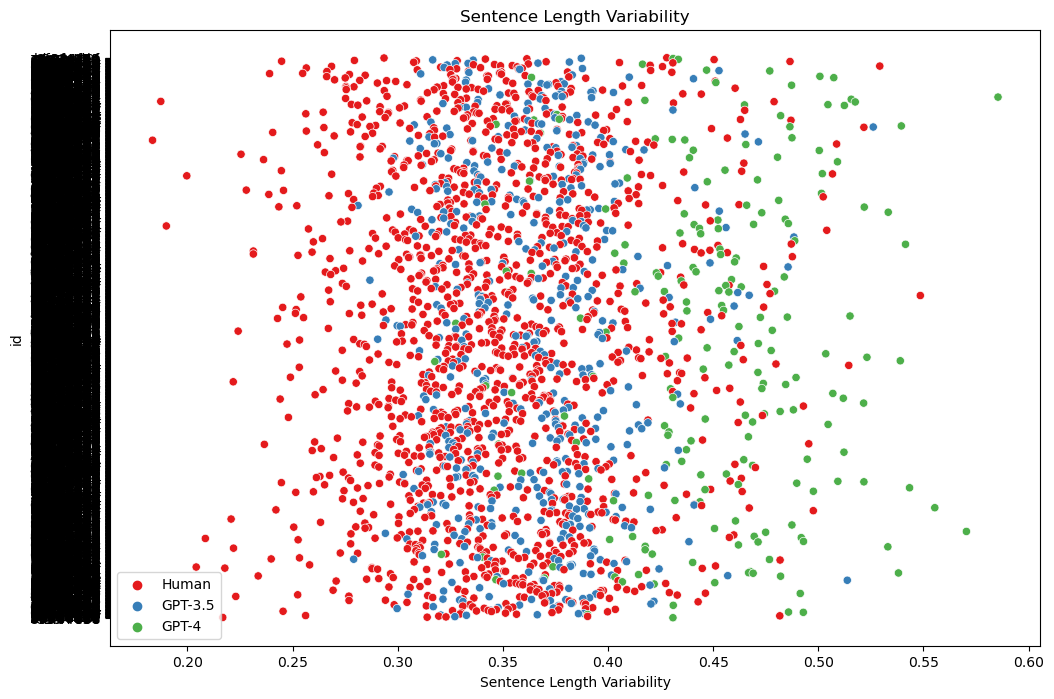

In [16]:
# Visualize the SLV of each essay
plt.figure(figsize=(12,8))
sns.scatterplot(x='SLV', y='id',data=data, legend='full', hue='generated', palette='Set1')

# Plot Median for each group
#plt.axvline(data[data['generated'] == 0]['SLV'].median(), color='red', linestyle='dashed', linewidth=.5)
#plt.axvline(data[data['generated'] == 1]['SLV'].median(), color='blue', linestyle='dashed', linewidth=.5)
#plt.axvline(data[data['generated'] == 2]['SLV'].median(), color='green', linestyle='dashed', linewidth=.5)

# Create Custom Legend and Map to Generated
handles, labels = plt.gca().get_legend_handles_labels()
labels = ['Human', 'GPT-3.5', 'GPT-4']
plt.legend(handles, labels)

# Add Median Labels
labels.append('Human Median')
labels.append('GPT-3.5 Median')
labels.append('GPT-4 Median')

plt.title('Sentence Length Variability')
plt.xlabel('Sentence Length Variability')
plt.savefig('../Charts/Sentence_Length_Variability.png')
plt.show()




 


